In [1]:
#TSNE
#import sklearn
from sklearn.manifold import TSNE
import numpy as np

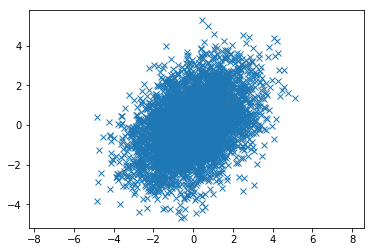

In [2]:
mean1 = [0, 0]
cov1 = [[2, 0.8], [0.8, 2]]  # diagonal covariance
import matplotlib.pyplot as plt
%matplotlib inline  
x, y = np.random.multivariate_normal(mean1, cov1, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [3]:
DIM = 3
SCALE = 1
NUMPTSPERCLUSTER=5000
numClusters = 10

np.random.seed(100)

X_final = None
labels  = None
for cl in range(0,numClusters):
    corr = np.random.uniform(-1,1,size=(DIM,DIM))
    corr = (corr + corr.T)/2
    np.fill_diagonal(corr, np.ones(DIM))
    sig = np.diag(np.random.uniform(low=0.0, high=1.0, size=DIM) * SCALE)
    mu  = np.ones(DIM)*cl*10
    cov = np.matmul(np.matmul(sig, corr),sig)
    print("Cluser %s" % cl)
    print(cov)
    X   = np.random.multivariate_normal(mu, cov, NUMPTSPERCLUSTER)
    if(X_final is None):
        X_final = X
        labels  = np.ones(NUMPTSPERCLUSTER) * cl
    else:
        X_final = np.vstack((X_final, X))
        labels  = np.append(labels, np.ones(NUMPTSPERCLUSTER)* cl)

Cluser 0
[[ 0.33073234  0.06312357  0.0114616 ]
 [ 0.06312357  0.79445483 -0.00980406]
 [ 0.0114616  -0.00980406  0.04376553]]
Cluser 1
[[ 0.2285823   0.01026744  0.08885732]
 [ 0.01026744  0.30455305 -0.01077493]
 [ 0.08885732 -0.01077493  0.12659289]]
Cluser 2
[[ 0.38716866 -0.01829687 -0.25663171]
 [-0.01829687  0.55920106  0.01180164]
 [-0.25663171  0.01180164  0.28031065]]
Cluser 3
[[ 0.84783683  0.01750991  0.24222678]
 [ 0.01750991  0.52922167 -0.37271562]
 [ 0.24222678 -0.37271562  0.81980837]]
Cluser 4
[[ 1.32260387e-02 -6.13374994e-03 -5.77696595e-05]
 [-6.13374994e-03  8.21974896e-01  2.85145167e-01]
 [-5.77696595e-05  2.85145167e-01  3.41800099e-01]]
Cluser 5
[[ 0.20582171  0.04501977 -0.16332253]
 [ 0.04501977  0.09952168  0.08477277]
 [-0.16332253  0.08477277  0.60960671]]
Cluser 6
[[ 0.10046471  0.00322298 -0.01431762]
 [ 0.00322298  0.00873595 -0.01213725]
 [-0.01431762 -0.01213725  0.99761178]]
Cluser 7
[[ 0.11330358  0.01195253  0.07562039]
 [ 0.01195253  0.05641485 -

In [ ]:
print(X_final.shape)
print(labels.shape)
print(labels[0:10])

(50000, 3)
(50000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
model = TSNE(n_components=2, random_state=0)
#configuring the parameters
# the number of components = 2
# Default perpelsity  = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

%time tsne_data = model.fit_transform(X_final)

In [ ]:
#Creating a new data frame which help us in plotting the result data
import pandas as pd
tsne_data_stack = np.append(tsne_data, np.array([labels]).T, axis=1)
tsne_df = pd.DataFrame(data= tsne_data_stack, columns = ("Dim_1", "Dim_2", "label"))

In [ ]:
np.array([labels]).T.shape

In [ ]:
print(type(tsne_data))
tsne_data.shape

In [ ]:
type(labels)
labels.shape

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline  
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2")
plt.show()